# All-NBA Team

The All-NBA Team is an annual honor bestowed by the National Basketball Association (NBA) to recognize the top players in the league for a particular season. The All-NBA Team consists of three separate teams: the First Team, the Second Team, and the Third Team. Each team includes two guards, two forwards, and one center, making a total of 15 players recognized each season.

The selections are made by a panel of sportswriters and broadcasters who cover the NBA. Players are voted upon based on their performance during the regular season, including statistics, contributions to their team's success, leadership, and impact on the game. The players who receive the most votes in their respective positions and categories are named to the All-NBA First Team, followed by the Second Team and then the Third Team.

Being named to an All-NBA Team is a significant achievement in a player's career, as it signifies their recognition as one of the best players in the league for that particular season. It also has financial implications, as being selected to an All-NBA Team can make a player eligible for a "supermax" contract extension with their current team, which offers a higher salary than a standard maximum contract.

# Superstar in NBA

A superstar in the NBA is an exceptional player who stands as an outlier in terms of statistical performance, consistently achieving elite levels that significantly deviate from the norms of the league. These players showcase statistical outliers in various categories, including points, rebounds, assists, steals, blocks, efficiency metrics, and impact measures such as Player Efficiency Rating (PER), Win Shares, and Box Plus-Minus. Their statistical profile not only sets them apart but also places them in a rarefied category of players who exhibit:

* Scoring Mastery: Superstars consistently exhibit an extraordinary ability to score, regularly posting point totals that place them among the highest in the league.

* Playmaking Brilliance: Their playmaking skills go beyond standard expectations, with exceptional assist numbers that demonstrate their capability to orchestrate offensive plays and involve teammates.

* Remarkable Rebounding: Even if not playing in traditional rebounding positions, superstars display remarkable rebounding prowess, contributing significantly on both offensive and defensive boards.

* Defensive Excellence: They stand out defensively by consistently accumulating steals and blocks, disrupting opponents' plays and contributing to their team's overall defensive effectiveness.


As true outliers, superstars not only redefine statistical norms but also leave an indelible mark on the game through their unique combination of skills, leadership, and the capacity to shape the narrative of basketball itself.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('NBARegStats.csv', encoding='ISO-8859-1',sep=';')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


# Data Cleaning

In [7]:
df = df.drop(['Rk','GS','FG%','ORB','DRB','TOV','2P%','3P%','FT%','PF'], axis=1)

# TOV dropped because there is no another passing-based column to provide context
# ORB and DRB is also a very contextual stats. Hence it's dropped.
# Rk provide no means

# Introduction

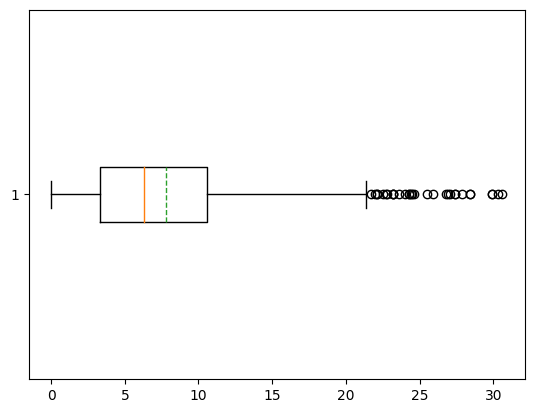

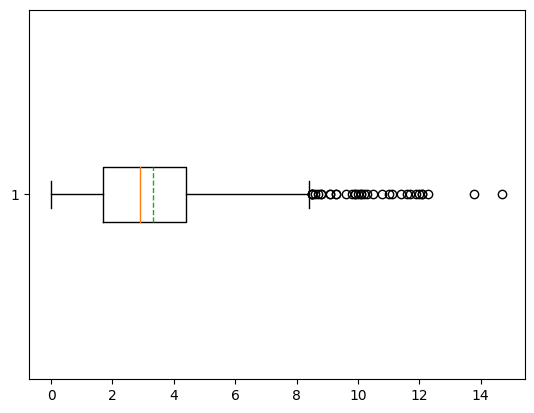

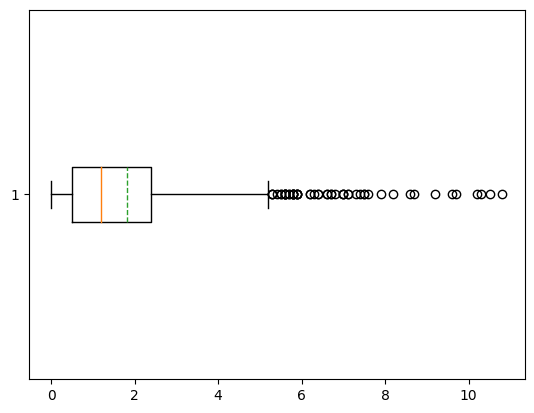

In [8]:
plt.boxplot(df['PTS'], vert=False, meanline=True, showmeans=True)
plt.show()
plt.boxplot(df['TRB'], vert=False, meanline=True, showmeans=True)
plt.show()
plt.boxplot(df['AST'], vert=False, meanline=True, showmeans=True)
plt.show()

Let's delve into a simple analysis using basic statistical tools to identify potential candidates for the All-NBA teams based on their statistical performance. Boxplots, means, interquartile ranges (IQR), and upper bounds are used to determine players who significantly outperform their peers in specific statistical categories.

* Step 1: Boxplots
Create boxplots for each statistical category, showing the distribution of data points. The boxplot will help us identify potential outliers—players who are significantly distant from the rest of the distribution. These outliers could be strong candidates for the All-NBA teams.

* Step 2: Calculation of Mean and IQR
Calculate the mean and interquartile range (IQR) for each statistical category. The mean gives us the average performance, while the IQR indicates the spread of data around the median.

* Step 3: Identifying Upper Bound for Potential Outliers
Calculate an upper bound for potential outliers by adding a certain multiple of the IQR to the third quartile (Q3) of the data. Any data point beyond this upper bound could be considered as an outlier.

* Step 4: Selection Criteria
Players whose statistics significantly surpass the upper bounds for respective categories could be strong candidates for All-NBA teams. Their performances are so exceptional that they outperform a substantial portion of the league in those categories.

* Step 5: Finalizing Selection
Based on the candidates identified through these steps, you can make a final selection for the All-NBA teams by considering both statistical excellence and overall impact on team success.

Remember, this simple analysis is a starting point and doesn't capture all the nuances of player performance, such as leadership, intangibles, and defensive contributions. Also, the specific values for upper bounds and the number of IQRs to add depend on the distribution of data in each category and can be adjusted accordingly.

By utilizing these basic statistical tools, we can identify players whose performances greatly deviate from the norm and are strong contenders for selection to the All-NBA teams based on the assumption that NBA superstars massively outperform the rest of the league in their respective statistical categories.

general consideration:
* the player have to play 75% of total games available
* statistical measure are imposed players specific position and compared to its group bracket. hence, upper bound for guards and wings will differs from the bigs. and so on.
* categories for position are divided into two: defensive and scoring
* defensive aspect mainly leans into more conservative task of the respective role
* to be considered as scorer on scoring category, you have to be the outliers at 'FGA'. because from there it's safe to assume the player are main job is to score. 

Glossarium:
* PTS : average points scored
* TRB : Average total rebounds
* AST : average assists
* BLK : average blocks
* STL : average steals

** all through 2021-2022 regular season

# Bigs (PF and Center)

In [9]:
Q1blkCPF = df[(df['Pos']=='C')|(df['Pos']=='PF')]['BLK'].quantile(0.25)
Q3blkCPF = df[(df['Pos']=='C')|(df['Pos']=='PF')]['BLK'].quantile(0.75)
IQRblkCPF = Q3blkCPF - Q1blkCPF
meanblkCPF = df[(df['Pos']=='C')|(df['Pos']=='PF')]['BLK'].mean()

In [10]:
Q1ptsCPF = df[(df['Pos']=='C')|(df['Pos']=='PF')]['PTS'].quantile(0.25)
Q3ptsCPF = df[(df['Pos']=='C')|(df['Pos']=='PF')]['PTS'].quantile(0.75)
IQRptsCPF = Q3ptsCPF - Q1ptsCPF
meanptsCPF = df[(df['Pos']=='C')|(df['Pos']=='PF')]['PTS'].mean()

In [11]:
Q1trbCPF = df[(df['Pos']=='C')|(df['Pos']=='PF')]['TRB'].quantile(0.25)
Q3trbCPF = df[(df['Pos']=='C')|(df['Pos']=='PF')]['TRB'].quantile(0.75)
IQRtrbCPF = Q3trbCPF - Q1trbCPF
meantrbCPF = df[(df['Pos']=='C')|(df['Pos']=='PF')]['TRB'].mean()

In [12]:
Q1fgaCPF = df[(df['Pos']=='C')|(df['Pos']=='PF')]['FGA'].quantile(0.25)
Q3fgaCPF = df[(df['Pos']=='C')|(df['Pos']=='PF')]['FGA'].quantile(0.75)
IQRfgaCPF = Q3fgaCPF - Q1fgaCPF
meanfgaCPF = df[(df['Pos']=='C')|(df['Pos']=='PF')]['FGA'].mean()

In [13]:
# Scoring Bigs (PF / Center)

SB = df[(df['G']>=df['G'].max()*0.75) & ((df['Pos']=='PF') | (df['Pos']=='C') | (df['Pos']=='C-PF')) & (df['PTS']>((Q3ptsCPF)+(1.5*IQRptsCPF)))& (df['FGA']>((Q3fgaCPF)+(1.5*IQRfgaCPF)))]
SB

,Player,Pos,Age,Tm,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,PTS
15,Giannis Antetokounmpo,PF,27,MIL,67,32.9,10.3,18.6,1.1,3.6,9.2,15.0,0.582,8.3,11.4,11.6,5.8,1.1,1.4,29.9
78,Miles Bridges,PF,23,CHO,80,35.5,7.5,15.2,1.9,5.8,5.5,9.4,0.554,3.3,4.2,7.0,3.8,0.9,0.8,20.2
167,DeMar DeRozan,PF,32,CHI,76,36.1,10.2,20.2,0.7,1.9,9.5,18.3,0.521,6.8,7.8,5.2,4.9,0.9,0.3,27.9
206,Joel Embiid,C,27,PHI,68,33.8,9.8,19.6,1.4,3.7,8.4,15.9,0.534,9.6,11.8,11.7,4.2,1.1,1.5,30.6
391,Nikola Joki?,C,26,DEN,74,33.5,10.3,17.7,1.3,3.9,9.0,13.8,0.620,5.1,6.3,13.8,7.9,1.5,0.9,27.1
617,Julius Randle,PF,27,NYK,72,35.3,7.1,17.3,1.7,5.4,5.4,11.9,0.459,4.2,5.6,9.9,5.1,0.7,0.5,20.1
667,Pascal Siakam,PF,27,TOR,68,37.9,8.8,17.8,1.1,3.2,7.7,14.5,0.525,4.2,5.6,8.5,5.3,1.3,0.6,22.8
736,Karl-Anthony Towns,C,26,MIN,74,33.5,8.7,16.4,2.0,4.9,6.6,11.5,0.591,5.2,6.3,9.8,3.6,1.0,1.1,24.6


In [14]:
# Defensive Bigs (PF / Center)

DB = df[(df['G']>=df['G'].max()*0.75) & ((df['Pos']=='PF') | (df['Pos']=='C')) & (df['BLK']>((Q3blkCPF)+(1.5*IQRblkCPF))) & (df['TRB']>((Q3trbCPF)+(1.5*IQRtrbCPF)))]
DB

,Player,Pos,Age,Tm,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,PTS
257,Rudy Gobert,C,29,UTA,66,32.1,5.5,7.7,0.0,0.1,5.5,7.6,0.713,4.6,6.7,14.7,1.1,0.7,2.1,15.6


# Guards and Wings

In [15]:
Q1ptsW = df[(df['Pos']=='SF')|(df['Pos']=='SG')]['PTS'].quantile(0.25)
Q3ptsW = df[(df['Pos']=='SF')|(df['Pos']=='SG')]['PTS'].quantile(0.75)
IQRptsW = Q3ptsW - Q1ptsW
meanptsW = df[(df['Pos']=='SF')|(df['Pos']=='SG')]['PTS'].mean()

In [16]:
Q1stlG = df[(df['Pos']=='PG')|(df['Pos']=='SG')]['STL'].quantile(0.25)
Q3stlG = df[(df['Pos']=='PG')|(df['Pos']=='SG')]['STL'].quantile(0.75)
IQRstlG = Q3stlG - Q1stlG
meanstlG = df[(df['Pos']=='PG')|(df['Pos']=='SG')]['STL'].mean()

In [17]:
Q1astG = df[(df['Pos']=='PG')|(df['Pos']=='SG')]['AST'].quantile(0.25)
Q3astG = df[(df['Pos']=='PG')|(df['Pos']=='SG')]['AST'].quantile(0.75)
IQRastG = Q3astG - Q1astG
meanastG = df[(df['Pos']=='PG')|(df['Pos']=='SG')|(df['Pos']=='SF')]['AST'].mean()

In [18]:
Q1fgaW = df[(df['Pos']=='PG')|(df['Pos']=='SG')|(df['Pos']=='SF')]['FGA'].quantile(0.25)
Q3fgaW = df[(df['Pos']=='PG')|(df['Pos']=='SG')|(df['Pos']=='SF')]['FGA'].quantile(0.75)
IQRfgaW = Q3fgaW - Q1fgaW
meanfgaW = df[(df['Pos']=='PG')|(df['Pos']=='SG')|(df['Pos']=='SF')]['FGA'].mean()

In [19]:
# Defensive Wings

DW = df[(df['G']>=df['G'].max()*0.75) & ((df['Pos']=='PG') | (df['Pos']=='SG') | (df['Pos']=='PG-SG') | (df['Pos']=='SF')) & (df['AST']>((Q3astG)+(1.5*IQRastG))) & (df['STL']>((Q3stlG)+(1.5*IQRstlG)))]
DW

,Player,Pos,Age,Tm,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,PTS
540,Dejounte Murray,PG,25,SAS,68,34.8,8.4,18.3,1.4,4.3,7.0,13.9,0.500,2.9,3.6,8.3,9.2,2.0,0.3,21.1
582,Chris Paul,PG,36,PHO,65,32.9,5.6,11.3,1.0,3.1,4.6,8.3,0.536,2.6,3.1,4.4,10.8,1.9,0.3,14.7


In [20]:
# Scoring Wings

SW = df[(df['G']>=df['G'].max()*0.75) & ((df['Pos']=='SF') | (df['Pos']=='SG') | (df['Pos']=='SG-PG') | (df['Pos']=='PG')) & (df['PTS']>((Q3ptsW)+(1.5*IQRptsW))) & (df['FGA']>((Q3fgaW)+(1.5*IQRfgaW))) ]
SW

,Player,Pos,Age,Tm,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,PTS
70,Devin Booker,SG,25,PHO,68,34.5,9.7,20.9,2.7,7.0,7.0,13.9,0.530,4.6,5.3,5.0,4.8,1.1,0.4,26.8
159,Stephen Curry,PG,33,GSW,64,34.5,8.4,19.1,4.5,11.7,3.9,7.4,0.554,4.3,4.7,5.2,6.3,1.3,0.4,25.5
178,Luka Don?i?,PG,22,DAL,65,35.4,9.9,21.6,3.1,8.8,6.8,12.8,0.529,5.6,7.5,9.1,8.7,1.2,0.6,28.4
515,Donovan Mitchell,SG,25,UTA,67,33.8,9.2,20.5,3.5,9.8,5.7,10.8,0.533,4.0,4.7,4.2,5.3,1.5,0.2,25.9
708,Jayson Tatum,SF,23,BOS,76,35.9,9.3,20.6,3.0,8.6,6.3,12.0,0.526,5.3,6.2,8.0,4.4,1.0,0.6,26.9
808,Trae Young,PG,23,ATL,76,34.9,9.4,20.3,3.1,8.0,6.3,12.3,0.536,6.6,7.3,3.7,9.7,0.9,0.1,28.4


# All Around Threat

this selection of players are those who clocked good offensive statistical value better than the rest of the NBA, regardless of position. this metrics also present to accomodate new generation of players, like big guards for example (Luka, Ben Simmons, LeBron), who might be asked to do more than just a guard jobs. 

In [21]:
# Points
Q1pts = df['PTS'].quantile(0.25)
Q3pts = df['PTS'].quantile(0.75)
IQRpts = Q3pts - Q1pts
meanpts = df['PTS'].mean()

# Rebounds
Q1trb = df['TRB'].quantile(0.25)
Q3trb = df['TRB'].quantile(0.75)
IQRtrb = Q3trb - Q1trb
meantrb = df['TRB'].mean()

# Assists
Q1ast = df['AST'].quantile(0.25)
Q3ast = df['AST'].quantile(0.75)
IQRast = Q3ast - Q1ast
meanast = df['AST'].mean()

In [22]:
# All Around Offensive Threat

AAO = df[(df['G']>=df['G'].max()*0.75) & (df['PTS']>((Q3pts)+(1.5*IQRpts))) & (df['TRB']>((Q3trb)+(1.5*IQRtrb))) & (df['AST']>((Q3ast)+(1.5*IQRast)))]
AAO

,Player,Pos,Age,Tm,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,PTS
15,Giannis Antetokounmpo,PF,27,MIL,67,32.9,10.3,18.6,1.1,3.6,9.2,15.0,0.582,8.3,11.4,11.6,5.8,1.1,1.4,29.9
178,Luka Don?i?,PG,22,DAL,65,35.4,9.9,21.6,3.1,8.8,6.8,12.8,0.529,5.6,7.5,9.1,8.7,1.2,0.6,28.4
391,Nikola Joki?,C,26,DEN,74,33.5,10.3,17.7,1.3,3.9,9.0,13.8,0.620,5.1,6.3,13.8,7.9,1.5,0.9,27.1
667,Pascal Siakam,PF,27,TOR,68,37.9,8.8,17.8,1.1,3.2,7.7,14.5,0.525,4.2,5.6,8.5,5.3,1.3,0.6,22.8


# The Special 'Special'

the premise for this special case is to see players who perform good (if not better) than the rest of the pack at something that traditionally not assigned to their respective position. these cases might happens often since today NBA is more 'positionless' than ever.

metrics selection: 
* if there are more than one option, we use the best selection for each metrics. for example, the upper bound pts for center is higher than the upperbound pts for guard, then the former is chosen. And so on.

In [23]:
ubptsCPF = (Q3ptsCPF)+(1.5*IQRptsCPF)
ubptsW = (Q3ptsW)+(1.5*IQRptsW)
ubtrbCPF = (Q3trbCPF)+(1.5*IQRtrbCPF)
ubastG = (Q3astG)+(1.5*IQRastG)

pd.DataFrame({
    'Metrics' : ['PTS','TRB','AST'],
    'Value' : [ubptsW,ubtrbCPF,ubastG]
})

,Metrics,Value
0,PTS,22.2500
1,TRB,10.5375
2,AST,7.6500


In [24]:
# The Special 'Special'

SS = df[(df['G']>=df['G'].max()*0.75) & (df['AST']>ubastG) & (df['PTS']>ubptsW) & (df['TRB']>ubtrbCPF)]
SS

,Player,Pos,Age,Tm,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,PTS
391,Nikola Joki?,C,26,DEN,74,33.5,10.3,17.7,1.3,3.9,9.0,13.8,0.62,5.1,6.3,13.8,7.9,1.5,0.9,27.1


shockingly, there is only one name on this list. and coincidently, he is also, our last season mvp. from sombor, serbia, ladies and gentleman, the one and only, **Nikola Jokic**.

# All-NBA

In [25]:
AllStars = pd.concat([SB,DB,DW,AAO,SS,SW],axis=0)
AllStars = AllStars.drop_duplicates().reset_index(drop=True)

In [26]:
AllStars.at[4, 'Player'] = 'Nikola Jokic'
AllStars.at[11, 'Player'] = 'Luka Doncic'

In [27]:
AllStars

,Player,Pos,Age,Tm,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,PTS
0,Giannis Antetokounmpo,PF,27,MIL,67,32.9,10.3,18.6,1.1,3.6,9.2,15.0,0.582,8.3,11.4,11.6,5.8,1.1,1.4,29.9
1,Miles Bridges,PF,23,CHO,80,35.5,7.5,15.2,1.9,5.8,5.5,9.4,0.554,3.3,4.2,7.0,3.8,0.9,0.8,20.2
2,DeMar DeRozan,PF,32,CHI,76,36.1,10.2,20.2,0.7,1.9,9.5,18.3,0.521,6.8,7.8,5.2,4.9,0.9,0.3,27.9
3,Joel Embiid,C,27,PHI,68,33.8,9.8,19.6,1.4,3.7,8.4,15.9,0.534,9.6,11.8,11.7,4.2,1.1,1.5,30.6
4,Nikola Jokic,C,26,DEN,74,33.5,10.3,17.7,1.3,3.9,9.0,13.8,0.620,5.1,6.3,13.8,7.9,1.5,0.9,27.1
5,Julius Randle,PF,27,NYK,72,35.3,7.1,17.3,1.7,5.4,5.4,11.9,0.459,4.2,5.6,9.9,5.1,0.7,0.5,20.1
6,Pascal Siakam,PF,27,TOR,68,37.9,8.8,17.8,1.1,3.2,7.7,14.5,0.525,4.2,5.6,8.5,5.3,1.3,0.6,22.8
7,Karl-Anthony Towns,C,26,MIN,74,33.5,8.7,16.4,2.0,4.9,6.6,11.5,0.591,5.2,6.3,9.8,3.6,1.0,1.1,24.6
8,Rudy Gobert,C,29,UTA,66,32.1,5.5,7.7,0.0,0.1,5.5,7.6,0.713,4.6,6.7,14.7,1.1,0.7,2.1,15.6
9,Dejounte Murray,PG,25,SAS,68,34.8,8.4,18.3,1.4,4.3,7.0,13.9,0.500,2.9,3.6,8.3,9.2,2.0,0.3,21.1


we need more detailed data to trim the numbers down to 15 (the number of all nba players), since players on this table are already the best of their respective "position". Or maybe that is where the media bias came to play. But nevertheless, we can compare it to 2021-2022 actual result:

In [28]:
realresults = pd.DataFrame({
    'Players' : ['Giannis Antetokounmpo','Devin Booker', 'Jayson Tatum', 'Luka Doncic', 'Nikola Jokic', 'Stephen Curry','Ja Morant','DeMar DeRozan','Kevin Durant', 'Joel Embiid', 'Karl-Anthony Towns','Trae Young','Chris Paul','Jimmy Butler','LeBron James']
})
realresults

,Players
0,Giannis Antetokounmpo
1,Devin Booker
2,Jayson Tatum
3,Luka Doncic
4,Nikola Jokic
5,Stephen Curry
6,Ja Morant
7,DeMar DeRozan
8,Kevin Durant
9,Joel Embiid


mind you that 4 out of the 15 players here (LeBron James, Ja Morant, Kevin Durant, Jimmy Butler) didn't fit the initial category of minimum 75% games played. The rest of the players are included on the list. so it's almost safe to say that the selected best players are also the best statistically.